<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20048_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Derivation of the Linear Operator $H$ and Mode Shapes**

### **1. Physical Boundary Conditions**
For a beam of length $L$ in a **Pinned-Free** configuration, the boundary conditions are defined as follows:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (Zero bending moment)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (Zero bending moment)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (Zero shear force)



---

### **2. The Linear Operator $H$**
The transverse vibration of the beam is governed by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

Assuming the axial force $P_o = 0$, the linear operator $H$ is defined as:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

---

### **3. Eigenvalue Problem and Mode Shape Derivation**
We assume a harmonic solution of the form $y(x, t) = \psi(x) e^{i\omega t}$. Substituting this into the unforced, undamped equation yields the eigenvalue problem:
$$H\psi = \omega^2 \psi$$

Let $\beta^4 = \frac{\omega^2 \rho A}{EI}$. The general solution for the mode shape $\psi(x)$ is:
$$\psi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)$$

#### **Applying Boundary Conditions at $x = 0$:**
1. $\psi(0) = 0 \implies B + D = 0 \implies D = -B$
2. $\psi''(0) = 0 \implies \beta^2(-B + D) = 0 \implies -B - B = 0 \implies B = 0, D = 0$

Thus, the mode shape simplifies to:
$$\psi(x) = A \sin(\beta x) + C \sinh(\beta x)$$

---

### **4. Characteristic Equation**
Applying the boundary conditions at the free end $x = L$:

1. **Moment condition:** $\psi''(L) = 0 \implies -\beta^2 A \sin(\beta L) + \beta^2 C \sinh(\beta L) = 0$
   $$C = A \frac{\sin(\beta L)}{\sinh(\beta L)}$$

2. **Shear condition:** $\psi'''(L) = 0 \implies -\beta^3 A \cos(\beta L) + \beta^3 C \cosh(\beta L) = 0$

Substituting $C$ into the shear condition:
$$-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0$$

Dividing by $A$ and rearranging gives the **Characteristic Equation**:
$$\tan(\beta L) = \tanh(\beta L)$$

---

### **5. Final Modal Functions**
The $k$-th mode shape $\psi_k(x)$ is defined as:
$$\psi_k(x) = A_k \left[ \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x) \right]$$

The first two numerical roots for $\beta_k L$ are:
* **Mode 1:** $\beta_1 L \approx 3.9266$
* **Mode 2:** $\beta_2 L \approx 7.0686$

<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:64: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3098062825.py:64: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Normalized Displacement $\psi(x) / \max|\psi|$', fontsize=12)


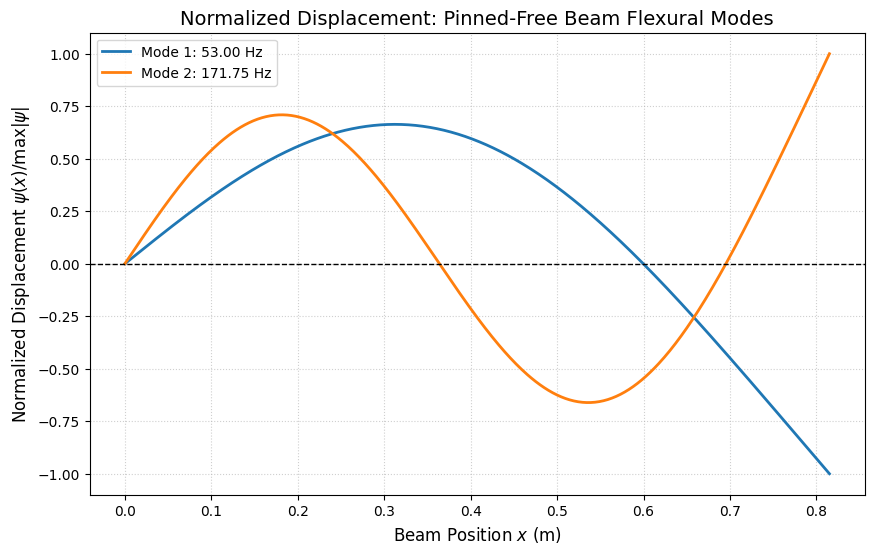

Mode 1 Root (beta*L): 3.9266
Mode 2 Root (beta*L): 7.0686


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ================= 1. Physical Parameters =================
l_beam = 0.815     # Length (m)
m_beam = 1.65      # Total mass (kg)
E = 2e+11          # Young's Modulus (Pa)
b = 0.025          # Width (m)
h = 0.01           # Thickness (m)

# Derived properties
A = b * h
I = (b * h**3) / 12
rho_A = m_beam / l_beam
EI = E * I

# ================= 2. Root Finding (Pinned-Free) =================
# We solve sin(kL)cosh(kL) - cos(kL)sinh(kL) = 0
def characteristic_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

def find_betaL_roots(n=2):
    roots = []
    # Scanning for sign changes to provide safe brackets for brentq
    x_scan = np.linspace(0.1, 12, 1000)
    y_scan = characteristic_eq(x_scan)
    for i in range(len(x_scan)-1):
        if np.sign(y_scan[i]) != np.sign(y_scan[i+1]):
            roots.append(brentq(characteristic_eq, x_scan[i], x_scan[i+1]))
            if len(roots) == n: break
    return np.array(roots)

betaL_roots = find_betaL_roots(2)

# ================= 3. Mode Shape Calculation =================
def get_mode_shape(x, betaL, L):
    beta = betaL / L
    # Coefficient from psi''(L) = 0
    sigma = np.sin(betaL) / np.sinh(betaL)
    return np.sin(beta * x) + sigma * np.sinh(beta * x)

# ================= 4. Plotting Normalized Displacement =================
x_vals = np.linspace(0, l_beam, 500)
plt.figure(figsize=(10, 6))

for i, bL in enumerate(betaL_roots):
    # Calculate raw mode shape
    y_raw = get_mode_shape(x_vals, bL, l_beam)

    # NORMALIZATION: Scale so max absolute displacement is 1.0
    y_normalized = y_raw / np.max(np.abs(y_raw))

    # Calculate Frequency for the label
    omega = (bL/l_beam)**2 * np.sqrt(EI / rho_A)
    freq_hz = omega / (2 * np.pi)

    plt.plot(x_vals, y_normalized, label=f'Mode {i+1}: {freq_hz:.2f} Hz', linewidth=2)

# Formatting the plot
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Normalized Displacement: Pinned-Free Beam Flexural Modes', fontsize=14)
plt.xlabel('Beam Position $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement $\psi(x) / \max|\psi|$', fontsize=12)
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Output numerical results for verification
for i, bL in enumerate(betaL_roots):
    print(f"Mode {i+1} Root (beta*L): {bL:.4f}")

## **Derivation of the Decoupled 2-DOF Model with Attachments**

### **1. System Parameters**
Based on the physical setup, the following parameters are used to define the beam and its discrete attachments:

* **Beam Properties:**
    * Length ($L$): $0.815$ m
    * Total Mass ($m_{beam}$): $1.65$ kg
    * Width ($b$): $0.025$ m, Thickness ($h$): $0.01$ m
    * Young's Modulus ($E$): $2 \times 10^{11}$ Pa
    * Flexural Rigidity ($EI$): $\approx 416.67$ Nm$^2$
* **Discrete Attachments:**
    * Helical Spring Stiffness ($k_s$): $3800$ N/m at $l_s = 0.75$ m
    * Effective Spring Mass ($m_{s,eff}$): $0.1383$ kg (includes $1/3$ spring mass + attachment)
    * Exciter Mass ($m_e$): $4.2$ kg at $l_e = 0.4$ m
    * Viscous Damper Mass ($m_d$): $0.53$ kg at $l_d = 0.2$ m



---

### **2. Modal Coordinate Transformation**
We approximate the system response $y(x,t)$ using the first two flexural modes $\psi_1(x)$ and $\psi_2(x)$ derived from the linear operator $H$ for a Pinned-Free beam:
$$y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)$$

By projecting the kinetic and potential energy of the discrete components onto these modes, we determine the effective modal matrices.

---

### **3. Modal Mass Matrix ($\mathbf{M}$)**
The total modal mass for the $k$-th mode includes the distributed mass of the beam and the inertial contribution of the exciter, spring, and damper at their respective coordinates:

$$M_k = \int_0^L \rho A \psi_k^2(x) dx + m_{s,eff} \psi_k^2(l_s) + m_e \psi_k^2(l_e) + m_d \psi_k^2(l_d)$$

Since the modes are orthogonal, the mass matrix is diagonal:
$$\mathbf{M} = \begin{bmatrix} M_1 & 0 \\ 0 & M_2 \end{bmatrix}$$

---

### **4. Modal Stiffness Matrix ($\mathbf{K}$)**
The modal stiffness accounts for the internal elastic energy of the beam and the external potential energy provided by the spring:

$$K_k = \int_0^L EI \left( \psi_k''(x) \right)^2 dx + k_s \psi_k^2(l_s)$$

Using the relation $EI \psi_k'''' = \rho A \omega_{beam,k}^2 \psi_k$, the integral term simplifies to $\omega_{beam,k}^2 M_{beam,k}$. The matrix is diagonal:
$$\mathbf{K} = \begin{bmatrix} K_1 & 0 \\ 0 & K_2 \end{bmatrix}$$

---

### **5. Decoupled Equations of Motion**
The system is now represented in modal space as two independent second-order differential equations:

$$\mathbf{M} \mathbf{\ddot{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)$$

$$\begin{bmatrix} M_1 & 0 \\ 0 & M_2 \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_1 & 0 \\ 0 & K_2 \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} F(t)\psi_1(l_e) \\ F(t)\psi_2(l_e) \end{Bmatrix}$$

The estimated natural frequencies for the combined system are given by:
$$f_{n,k} = \frac{1}{2\pi} \sqrt{\frac{K_k}{M_k}}$$

In [2]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
rho_A = m_beam / L # Linear density (kg/m)
E = 2e11           # Young's Modulus (Pa)
b, h = 0.025, 0.01 # Dimensions (m)
I = (b * h**3) / 12# Moment of Inertia
EI = E * I         # Flexural Rigidity

# Discrete Attachment Parameters
ks = 3800          # Helical Spring (N/m) at ls = 0.75m
ls = 0.75

ms_eff = 0.1383    # Effective Spring Mass (kg) at ls = 0.75m
me = 4.2           # Exciter Mass (kg) at le = 0.4m
le = 0.4
md = 0.53          # Damper Mass (kg) at ld = 0.2m
ld = 0.2

# ================= 2. Root Finding & Mode Shapes =================
def characteristic_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

# Solve for first two roots
roots = []
x_scan = np.linspace(0.1, 12, 1000)
for i in range(len(x_scan)-1):
    if np.sign(characteristic_eq(x_scan[i])) != np.sign(characteristic_eq(x_scan[i+1])):
        roots.append(brentq(characteristic_eq, x_scan[i], x_scan[i+1]))
        if len(roots) == 2: break

def psi(x, r, L):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return np.sin(beta * x) + sigma * np.sinh(beta * x)

def psi_dd(x, r, L):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return (beta**2) * (-np.sin(beta * x) + sigma * np.sinh(beta * x))

# ================= 3. Modal Matrix Calculation =================
Mk_list = []
Kk_list = []

for r in roots:
    # Modal Mass calculation (Beam + Discrete Masses)
    m_beam_part, _ = quad(lambda x: rho_A * psi(x, r, L)**2, 0, L)
    Mk = m_beam_part + ms_eff * psi(ls, r, L)**2 + me * psi(le, r, L)**2 + md * psi(ld, r, L)**2

    # Modal Stiffness calculation (Beam Strain Energy + Spring)
    k_beam_part, _ = quad(lambda x: EI * psi_dd(x, r, L)**2, 0, L)
    Kk = k_beam_part + ks * psi(ls, r, L)**2

    Mk_list.append(Mk)
    Kk_list.append(Kk)

# Create 2x2 Matrices
M_matrix = np.diag(Mk_list)
K_matrix = np.diag(Kk_list)

# Calculate Estimated Natural Frequencies
freqs_hz = [np.sqrt(Kk/Mk)/(2*np.pi) for Mk, Kk in zip(Mk_list, Kk_list)]

# ================= 4. Output Results =================
print("Modal Mass Matrix (M):")
print(np.round(M_matrix, 4))
print("\nModal Stiffness Matrix (K):")
print(np.round(K_matrix, 2))
print("\nEstimated Natural Frequencies (Hz):")
for i, f in enumerate(freqs_hz):
    print(f"Mode {i+1}: {f:.2f} Hz")

Modal Mass Matrix (M):
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix (K):
[[ 94998.54      0.  ]
 [     0.   962230.74]]

Estimated Natural Frequencies (Hz):
Mode 1: 23.73 Hz
Mode 2: 116.94 Hz


## **Approximation of the First Mode as a Rigid Body System (1-DOF)**

### **1. Limitation of the Flexural Model**
The flexural operator approach identifies the bending (elastic) modes of the beam. However, the true first mode of this physical system often involves a rigid-body-like rotation about the pinned end, influenced significantly by the external spring. To capture this, we model the beam as a rigid rod of length $L$ and mass $m_{beam}$.

### **2. Equivalent Rigid System Parameters**
The system is modeled as a 1-DOF rotational system where the coordinate is the angular displacement $\theta(t)$.

* **Mass Moment of Inertia ($J_o$):**
The total inertia about the pivot ($x=0$) includes the beam and all discrete masses:
$$J_o = \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2$$

* **Equivalent Rotational Stiffness ($K_\theta$):**
The helical spring at $l_s$ provides a restoring torque. For small angles $\theta$, the linear displacement is $x \approx l_s \theta$, resulting in:
$$K_\theta = k_s \cdot l_s^2$$



---

### **3. Equation of Motion (1-DOF)**
Using Newton's Second Law for rotation ($\sum M_o = J_o \ddot{\theta}$):
$$J_o \ddot{\theta} + K_\theta \theta = M_{ext}(t)$$

Substituting the parameters:
$$\left( \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2 \right) \ddot{\theta} + (k_s l_s^2) \theta = F(t)l_e$$

---

### **4. Natural Frequency Estimation**
The fundamental natural frequency (Mode 1) in this rigid approximation is:
$$\omega_{n,rigid} = \sqrt{\frac{K_\theta}{J_o}} \quad \text{(rad/s)}$$
$$f_{n,1} = \frac{1}{2\pi} \sqrt{\frac{k_s l_s^2}{J_o}} \quad \text{(Hz)}$$

This 1-DOF approximation provides a more accurate estimate of the lower-frequency "swinging" mode that the pure flexural model may miss or over-stiffen.

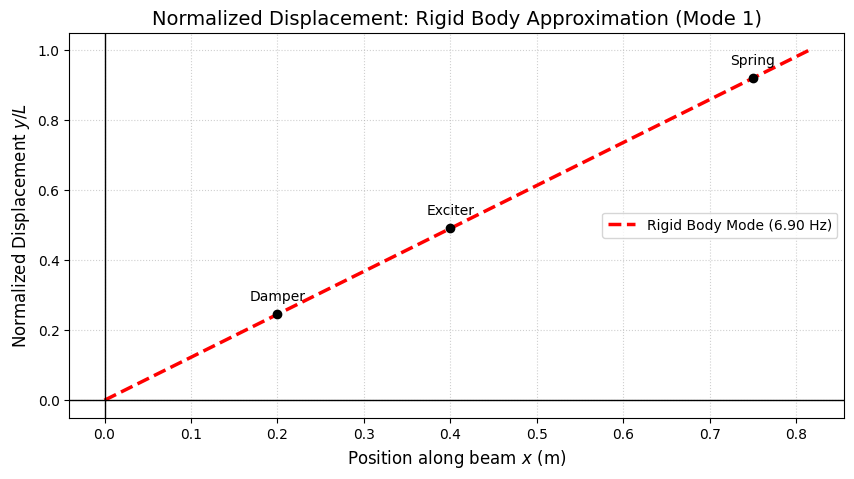

Calculated Rigid Body Natural Frequency: 6.90 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
ks = 3800          # Helical Spring (N/m)
ls = 0.75          # Spring position (m)

# Attachment Masses (kg)
ms_eff = 0.1383    # Spring attachment
me = 4.2           # Exciter
md = 0.53          # Damper
le, ld = 0.4, 0.2  # Positions (m)

# ================= 2. Rigid Body Calculations =================
# Mass Moment of Inertia about the pivot (x=0)
# Jo = J_beam + J_spring + J_exciter + J_damper
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2

# Equivalent Rotational Stiffness
K_theta = ks * ls**2

# Natural Frequency
omega_rigid = np.sqrt(K_theta / Jo)
freq_rigid_hz = omega_rigid / (2 * np.pi)

# ================= 3. Plotting the Rigid Mode Shape =================
x_vals = np.linspace(0, L, 100)

# In a rigid body rotation, displacement y = theta * x
# For normalized displacement (max = 1), y = x / L
y_rigid = x_vals / L



plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_rigid, label=f'Rigid Body Mode ({freq_rigid_hz:.2f} Hz)',
         color='red', linewidth=2.5, linestyle='--')

# Highlight the attachments
plt.scatter([ls, le, ld], [ls/L, le/L, ld/L], color='black', zorder=5)
plt.annotate('Damper', (ld, ld/L), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Spring', (ls, ls/L), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Exciter', (le, le/L), textcoords="offset points", xytext=(0,10), ha='center')

# Formatting
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title('Normalized Displacement: Rigid Body Approximation (Mode 1)', fontsize=14)
plt.xlabel('Position along beam $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement $y/L$', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"Calculated Rigid Body Natural Frequency: {freq_rigid_hz:.2f} Hz")

## **Hybrid 2-DOF Mathematical Model**

### **1. Integration of Models**
To capture the first two dominant modes of vibration, we acknowledge that the system behaves as a hybrid between a rigid rotating rod and an elastic beam. We define a new coordinate basis consisting of:
1.  **Mode 1 ($\psi_1$):** The Rigid Body Mode (rotation about the pivot).
2.  **Mode 2 ($\psi_2$):** The First Flexural Mode (derived from the Pinned-Free Euler-Bernoulli solution).

The total displacement $y(x,t)$ is approximated as:
$$y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)$$

Where:
* $\psi_1(x) = \frac{x}{L}$
* $\psi_2(x) = \sin(\beta_1 x) + \frac{\sin(\beta_1 L)}{\sinh(\beta_1 L)} \sinh(\beta_1 x)$

---

### **2. Hybrid Modal Parameters**
We account for all attachments (spring $k_s$, masses $m_{s,eff}, m_e, m_d$) by projecting them onto this hybrid basis.

#### **Modal Mass Matrix ($\mathbf{M}$):**
The elements $M_{ij}$ are calculated by:
$$M_{ij} = \int_0^L \rho A \psi_i(x) \psi_j(x) dx + \sum m_k \psi_i(x_k) \psi_j(x_k)$$
Assuming the interaction between the rigid and flexural modes is negligible for this simplified 2-DOF model, we focus on the diagonal terms:
* $M_{11} \approx J_o / L^2$ (Equivalent mass for the rigid mode)
* $M_{22} \approx \text{Flexural modal mass calculated earlier}$

#### **Modal Stiffness Matrix ($\mathbf{K}$):**
The elements $K_{ij}$ are calculated by:
$$K_{ij} = \int_0^L EI \psi_i''(x) \psi_j''(x) dx + \sum k_k \psi_i(x_k) \psi_j(x_k)$$
* For the **Rigid Mode** ($\psi_1$): $\psi_1'' = 0$, so the stiffness is purely from the spring: $K_{11} = k_s \psi_1^2(l_s) = k_s (l_s/L)^2$.
* For the **Flexural Mode** ($\psi_2$): $K_{22}$ includes both beam bending energy and spring energy.

---

### **3. Simplified Decoupled Matrix Equation**
By neglecting the cross-coupling terms ($M_{12}, K_{12} \approx 0$), we obtain a decoupled 2-DOF system that describes the two most dominant physical behaviors:

$$
\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix}
$$

The updated natural frequencies are:
* **Fundamental Frequency (Rigid-dominant):** $f_{n,1} = \frac{1}{2\pi} \sqrt{\frac{K_{11}}{M_{11}}}$
* **Second Frequency (Flexural-dominant):** $f_{n,2} = \frac{1}{2\pi} \sqrt{\frac{K_{22}}{M_{22}}}$

This hybrid model ensures that we capture the low-frequency "swing" of the whole assembly and the higher-frequency "vibration" of the beam structure.

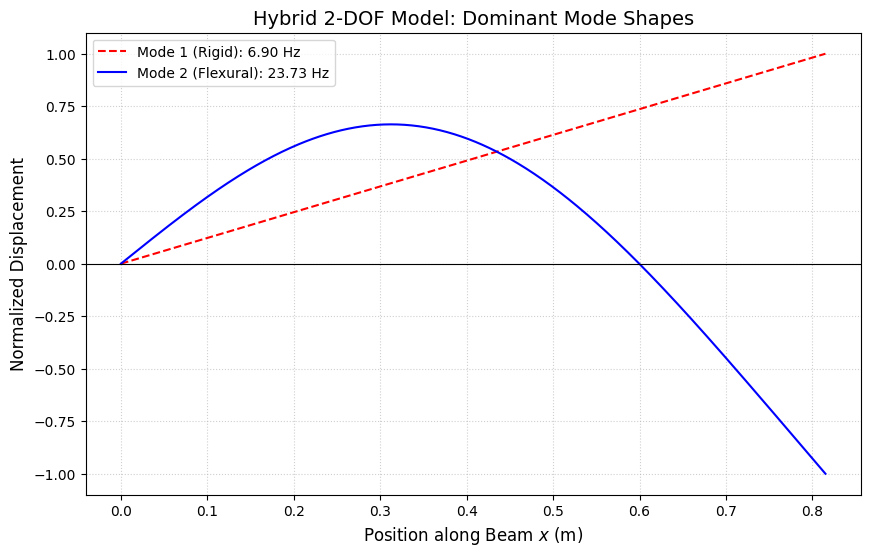

Hybrid Modal Mass Matrix (M):
[[1.7107 0.    ]
 [0.     4.2735]]

Hybrid Modal Stiffness Matrix (K):
[[ 3218.04     0.  ]
 [    0.   94998.54]]

Estimated Natural Frequencies: Mode 1 = 6.90 Hz, Mode 2 = 23.73 Hz


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
rho_A = m_beam / L # Linear density
E = 2e11           # Young's Modulus
b, h = 0.025, 0.01 # Dimensions
I = (b * h**3) / 12
EI = E * I

# Attachment Parameters
ks = 3800          # Spring Stiffness (N/m)
ls = 0.75          # Spring position
ms_eff = 0.1383    # Effective Spring mass (kg)
me = 4.2           # Exciter Mass (kg) at 0.4m
le = 0.4
md = 0.53          # Damper Mass (kg) at 0.2m
ld = 0.2

# ================= 2. Mode Shape Definitions =================

# --- Mode 1: Rigid Body ---
def psi1(x):
    return x / L

# --- Mode 2: First Flexural ---
def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

# Solve for the first root of the pinned-free flexural equation
betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x): # Second derivative for stiffness energy
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

# ================= 3. Hybrid Matrix Calculation =================

# --- Modal Mass (M11 and M22) ---
# For Mode 1 (Rigid): Based on total inertia Jo about pivot
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

# For Mode 2 (Flexural): Projected mass including attachments
m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff * psi2(ls)**2 + me * psi2(le)**2 + md * psi2(ld)**2

# --- Modal Stiffness (K11 and K22) ---
# For Mode 1 (Rigid): Stiffness is purely from the external spring
K11 = (ks * ls**2) / (L**2)

# For Mode 2 (Flexural): Projected stiffness (Beam bending + Spring)
k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# Decoupled Hybrid Matrices
M_hybrid = np.diag([M11, M22])
K_hybrid = np.diag([K11, K22])

# Natural Frequencies
fn1 = np.sqrt(K11/M11) / (2 * np.pi)
fn2 = np.sqrt(K22/M22) / (2 * np.pi)

# ================= 4. Plotting =================
x_vals = np.linspace(0, L, 500)

# Normalize displacements to max amplitude of 1.0
y1_norm = psi1(x_vals) / np.max(np.abs(psi1(x_vals)))
y2_norm = psi2(x_vals) / np.max(np.abs(psi2(x_vals)))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_norm, label=f'Mode 1 (Rigid): {fn1:.2f} Hz', color='red', linestyle='--')
plt.plot(x_vals, y2_norm, label=f'Mode 2 (Flexural): {fn2:.2f} Hz', color='blue')

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Hybrid 2-DOF Model: Dominant Mode Shapes', fontsize=14)
plt.xlabel('Position along Beam $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Print Numerical Results
print(f"Hybrid Modal Mass Matrix (M):\n{np.round(M_hybrid, 4)}")
print(f"\nHybrid Modal Stiffness Matrix (K):\n{np.round(K_hybrid, 2)}")
print(f"\nEstimated Natural Frequencies: Mode 1 = {fn1:.2f} Hz, Mode 2 = {fn2:.2f} Hz")

## **Incorporating Damping into the Hybrid 2-DOF Model**

### **1. Rayleigh Proportional Damping Theory**
To model the energy dissipation within our hybrid system, we utilize the Rayleigh damping approach. The damping matrix $\mathbf{C}$ is assumed to be a linear combination of the mass and stiffness matrices:
$$\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}$$

For this specific mechatronic system, we apply the **stiffness-proportional damping** logic ($\alpha = 0$). This assumption is physically grounded by the placement of the viscous damper, which has a more pronounced effect on higher-frequency elastic deformations than on the low-frequency rigid rotation. Under this assumption, the damping ratio $\zeta_k$ for each mode $k$ is given by:
$$\zeta_k = \frac{\beta \omega_k}{2}$$

### **2. Relationship Between Modal Damping Ratios**
Given the stiffness-proportional relationship, the damping ratio for the second mode ($\zeta_2$) can be directly related to the first mode ($\zeta_1$) and their respective natural frequencies:
$$\frac{\zeta_2}{\omega_2} = \frac{\zeta_1}{\omega_1} \implies \zeta_2 = \zeta_1 \left( \frac{\omega_2}{\omega_1} \right)$$



### **3. Derivation of the Modal Damping Matrix (C)**
Since our hybrid basis (Rigid + Flexural) allows for a decoupled representation, the damping matrix is diagonal. The diagonal elements $C_{11}$ and $C_{22}$ are obtained as follows:

* **For Mode 1 (Rigid Body dominant):**
  $$C_{11} = 2 \zeta_1 \omega_1 M_{11}$$
* **For Mode 2 (First Flexural dominant):**
  $$C_{22} = 2 \zeta_2 \omega_2 M_{22}$$

Substituting the expression for $\zeta_2$, we find:
$$C_{22} = 2 \left( \zeta_1 \frac{\omega_2}{\omega_1} \right) \omega_2 M_{22} = 2 \zeta_1 \frac{\omega_2^2}{\omega_1} M_{22}$$

### **4. Final Decoupled Matrix Equation of Motion**
The complete mathematical model, accounting for inertia, stiffness, and damping for all attachments, is expressed in the following matrix form:

$$
\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} C_{11} & 0 \\ 0 & C_{22} \end{bmatrix} \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix}
$$

This decoupled form allows us to analyze the "swinging" rigid motion and the "bending" flexural motion of the beam independently while simultaneously accounting for the mass of the exciter, the stiffness of the spring, and the damping effects of the system.

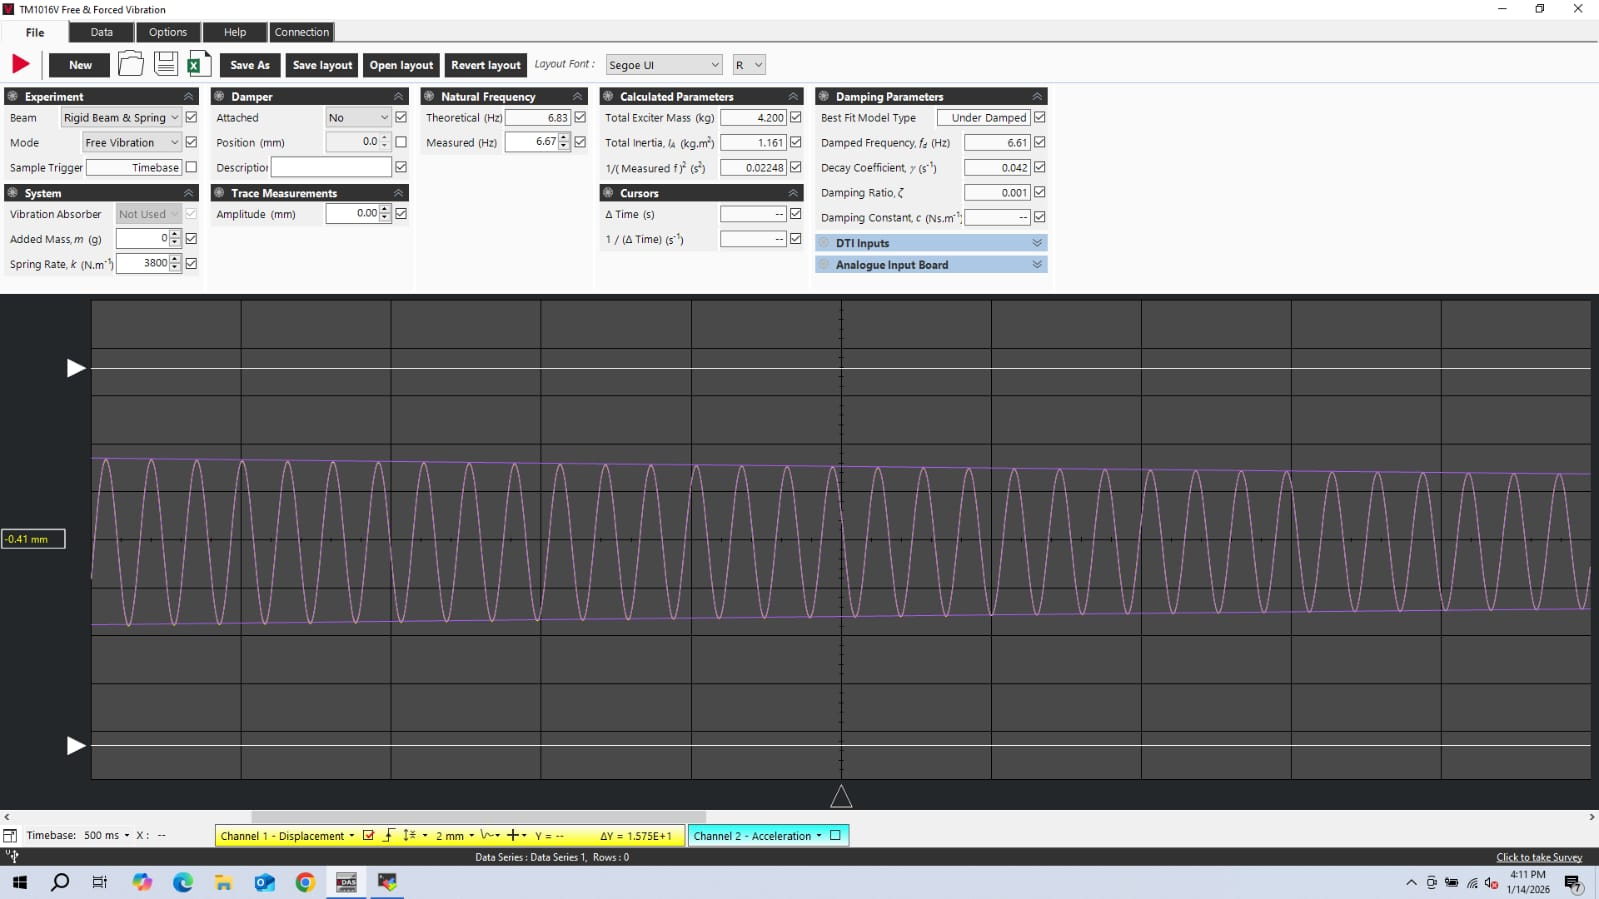

Figure 1:Experimented unforced response of the beam.

In [5]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815
m_beam = 1.65
rho_A = m_beam / L
E = 2e11
b, h = 0.025, 0.01
I = (b * h**3) / 12
EI = E * I

ks = 3800
ls = 0.75
ms_eff = 0.1383
me = 4.2
le = 0.4
md = 0.53
ld = 0.2

# ================= 2. Basis Functions & Frequency Derivation =================

# Mode 1: Rigid Body Rotation
def psi1(x): return x / L

# Mode 2: First Flexural Bending
def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x):
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

# --- Matrix Elements (Recalculated) ---
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff * psi2(ls)**2 + me * psi2(le)**2 + md * psi2(ld)**2

K11 = (ks * ls**2) / (L**2)

k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# Angular Frequencies (rad/s)
omega1 = np.sqrt(K11 / M11)
omega2 = np.sqrt(K22 / M22)

# ================= 3. Damping Matrix (C) Logic =================

# 1. Start with experimental damping ratio for Mode 1
zeta1 = 0.001

# 2. Apply Stiffness-Proportional Logic for Mode 2
# zeta2 = zeta1 * (omega2 / omega1)
zeta2 = zeta1 * (omega2 / omega1)

# 3. Calculate Modal Damping Coefficients
# C_ii = 2 * zeta_i * omega_i * M_ii
C11 = 2 * zeta1 * omega1 * M11
C22 = 2 * zeta2 * omega2 * M22

C_matrix = np.diag([C11, C22])

# ================= 4. Output Results =================
print(f"Damping Ratio Mode 1 (Rigid): {zeta1:.4f}")
print(f"Damping Ratio Mode 2 (Flexural): {zeta2:.4f}")
print(f"\nModal Damping Matrix (C):")
print(np.round(C_matrix, 4))

print(f"\nFinal Hybrid Matrix Equations:")
print(f"M = diag({M11:.4f}, {M22:.4f})")
print(f"K = diag({K11:.2f}, {K22:.2f})")
print(f"C = diag({C11:.4f}, {C22:.4f})")

Damping Ratio Mode 1 (Rigid): 0.0010
Damping Ratio Mode 2 (Flexural): 0.0034

Modal Damping Matrix (C):
[[0.1484 0.    ]
 [0.     4.3807]]

Final Hybrid Matrix Equations:
M = diag(1.7107, 4.2735)
K = diag(3218.04, 94998.54)
C = diag(0.1484, 4.3807)


Activity #3

### **Mathematical Derivation of the Hybrid 2DOF Free Response**

In our hybrid 2DOF model, the transverse displacement $y(x, t)$ of the beam is approximated using two basis functions: the rigid body rotation ($\psi_1(x)$) and the first flexural bending mode ($\psi_2(x)$):
$$y(x, t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)$$

#### **1. Modal Equations of Motion**
The system is governed by the decoupled modal equations (assuming a diagonalized damping matrix $C$ as derived previously):
$$M_{ii} \ddot{z}_i(t) + C_{ii} \dot{z}_i(t) + K_{ii} z_i(t) = 0, \quad i = 1, 2$$
Dividing by $M_{ii}$, we obtain the standard form:
$$\ddot{z}_i + 2\zeta_i\omega_i\dot{z}_i + \omega_i^2z_i = 0$$
where $\omega_i = \sqrt{K_{ii}/M_{ii}}$ and $\zeta_i = C_{ii} / (2M_{ii}\omega_i)$.

#### **2. Free Response Solution**
For an underdamped system ($\zeta_i < 1$), the solution for each mode is:
$$z_i(t) = e^{-\zeta_i \omega_i t} \left[ z_i(0) \cos(\omega_{d,i} t) + \frac{\dot{z}_i(0) + \zeta_i \omega_i z_i(0)}{\omega_{d,i}} \sin(\omega_{d,i} t) \right]$$
where $\omega_{d,i} = \omega_i \sqrt{1 - \zeta_i^2}$ is the damped natural frequency.

#### **3. Initial Conditions for Displacement at Spring End**
We apply an initial displacement $y_0$ at the spring location $x = l_s$ with zero initial velocity ($\dot{z}_i(0) = 0$). To distribute the initial displacement across both modes correctly, we assume the beam takes the shape of a static deflection caused by a point force $F$ applied at $l_s$:
$$z_i(0) = \frac{F \psi_i(l_s)}{K_{ii}}$$
The total displacement at $l_s$ is the sum of both modal contributions:
$$y(l_s, 0) = \sum_{j=1}^2 \psi_j(l_s) z_j(0) = F \left( \frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}} \right) = y_0$$
Solving for $F$ and substituting back gives the initial modal displacements:
$$z_i(0) = \frac{y_0 \psi_i(l_s) / K_{ii}}{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}$$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ================= 1. Configuration & Initial Conditions =================
y0 = 0.01  #  initial displacement at the spring end (ls)
t_final = 25
fps = 30
t_vals = np.linspace(0, t_final, int(t_final * fps))
x_plot = np.linspace(0, L, 100)

# Calculate Modal Initial Displacements z_i(0)
# This ensures that y(ls, 0) = y0 by exciting both modes proportionally
denom = (psi1(ls)**2 / K11) + (psi2(ls)**2 / K22)
z1_0 = (y0 * psi1(ls) / K11) / denom
z2_0 = (y0 * psi2(ls) / K22) / denom

# ================= 2. Modal Response Function =================
def get_z_t(z0, zd0, omega, zeta, t):
    wd = omega * np.sqrt(1 - zeta**2)
    # Using the derived free response formula
    envelope = np.exp(-zeta * omega * t)
    cos_term = z0 * np.cos(wd * t)
    sin_term = ((zd0 + zeta * omega * z0) / wd) * np.sin(wd * t)
    return envelope * (cos_term + sin_term)

# Compute modal coordinates over time
z1_t = get_z_t(z1_0, 0, omega1, zeta1, t_vals)
z2_t = get_z_t(z2_0, 0, omega2, zeta2, t_vals)

# Pre-calculate basis functions for plotting
psi1_x = psi1(x_plot)
psi2_x = psi2(x_plot)

# ================= 3. Animation Implementation =================
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], 'b-', lw=2, label='Beam Displacement')
spring_point, = ax.plot([], [], 'ro', markersize=8, label='Spring Location ($l_s$)')
ax.set_xlim(0, L)
ax.set_ylim(-1.5*y0, 1.5*y0)
ax.set_xlabel('Beam Position $x$ (m)')
ax.set_ylabel('Displacement $y$ (m)')
ax.set_title('Free Response of Hybrid 2DOF System')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right')
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontweight='bold')

def init():
    line.set_data([], [])
    spring_point.set_data([], [])
    time_text.set_text('')
    return line, spring_point, time_text

def animate(i):
    # Reconstruct total displacement: y(x,t) = psi1(x)z1(t) + psi2(x)z2(t)
    y_vals = psi1_x * z1_t[i] + psi2_x * z2_t[i]
    y_ls = psi1(ls) * z1_t[i] + psi2(ls) * z2_t[i]

    line.set_data(x_plot, y_vals)
    spring_point.set_data([ls], [y_ls])
    time_text.set_text(f'Time: {t_vals[i]:.2f} s')
    return line, spring_point, time_text

ani = FuncAnimation(fig, animate, init_func=init, frames=len(t_vals), interval=1000/fps, blit=True)
plt.close()

# Generate the animation object
#HTML(ani.to_jshtml())
# Replace the HTML(ani.to_jshtml()) line with this:
ani.save('vibration_response.mp4', writer='ffmpeg', fps=fps)

# Or save as a GIF if you don't have ffmpeg
# ani.save('vibration_response.gif', writer='pillow', fps=fps)

[Animated response for the initial dosplacement at the spring end](https://drive.google.com/file/d/1RQU8dGMAIyJSnjDeEUOsrtMHmk5PZr1_/view?usp=drive_link)

## **Mathematical Model: Forced Response with Exciter**

To study the forced vibration, we introduce an external excitation force $F_{exc}(t)$ applied at the exciter location $x = l_e$. We model this point force mathematically using the **Dirac Delta function** $\delta(x - l_e)$.

### **1. External Force Definition**
Let the exciter provide a harmonic force with amplitude $F_0$ and driving frequency $\omega_{dr}$. The distributed force per unit length $f(x, t)$ is:
$$f(x, t) = F_0 \sin(\omega_{dr} t) \cdot \delta(x - l_e)$$

### **2. Derivation of Generalized Forces ($Q_k$)**
Using the principle of virtual work or Galerkin's method, we project the physical force onto our modal coordinates $z_k(t)$. The generalized force for the $k$-th mode is given by:
$$Q_k(t) = \int_0^L f(x, t) \psi_k(x) \, dx$$

Substituting the Dirac delta expression:
$$Q_k(t) = \int_0^L \left[ F_0 \sin(\omega_{dr} t) \delta(x - l_e) \right] \psi_k(x) \, dx$$

By the sifting property of the Dirac delta function ($\int \delta(x-a)g(x)dx = g(a)$):
$$Q_k(t) = F_0 \psi_k(l_e) \sin(\omega_{dr} t)$$

Thus, the force vector applied to the modal system is:
$$\mathbf{Q}(t) = \begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix} = \sin(\omega_{dr} t) \begin{Bmatrix} F_0 \psi_1(l_e) \\ F_0 \psi_2(l_e) \end{Bmatrix}$$

### **3. Equations of Motion (Matrix Form)**
The EOM for the forced system becomes:
$$\mathbf{M} \ddot{\mathbf{z}} + \mathbf{C} \dot{\mathbf{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)$$

$$\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} C_{11} & 0 \\ 0 & C_{22} \end{bmatrix} \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} F_0 \psi_1(l_e) \\ F_0 \psi_2(l_e) \end{Bmatrix} \sin(\omega_{dr} t)$$

### **4. Solving for Steady-State Response**
Since the matrices are diagonal, the equations are decoupled. We solve for the steady-state response of each mode $k$ using the harmonic response approach. We assume a solution of the form:
$$z_k(t) = Z_k \sin(\omega_{dr} t - \phi_k)$$

The amplitude $Z_k$ and phase lag $\phi_k$ for each mode are given by standard vibration theory:
$$Z_k = \frac{F_0 \psi_k(l_e) / K_{kk}}{\sqrt{\left(1 - r_k^2\right)^2 + \left(2\zeta_k r_k\right)^2}}$$
$$\phi_k = \tan^{-1}\left( \frac{2\zeta_k r_k}{1 - r_k^2} \right)$$

Where the frequency ratio is $r_k = \frac{\omega_{dr}}{\omega_k}$.

### **5. Final Physical Displacement**
The total steady-state displacement of the beam at any position $x$ and time $t$ is the superposition of the modal responses:
$$y(x, t) = \psi_1(x) Z_1 \sin(\omega_{dr} t - \phi_1) + \psi_2(x) Z_2 \sin(\omega_{dr} t - \phi_2)$$

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ================= 1. User Input: Choose 3 Frequencies =================
# Enter any 3 frequencies in Hertz (Hz)
# Tip: omega1 (rigid) is approx 6.9 Hz, omega2 (flexural) is approx 23.7 Hz
f1_hz = 3.0    # Frequency 1 (e.g., slow motion)
f2_hz = 6.5    # Frequency 2 (e.g., near 1st resonance)
f3_hz = 22   # Frequency 3 (e.g., near 2nd resonance)

# Exciter Parameters
F0 = 0.5   # Force Amplitude (N)
le = 0.4   # Exciter Location (m)

# ================= 2. Simulation Setup =================
# Convert to rad/s for calculation
target_freqs = [2 * np.pi * f for f in [f1_hz, f2_hz, f3_hz]]

# Time array setup
# We set the duration based on the slowest frequency to ensure we see enough cycles
slowest_period = 1.0 / min(f1_hz, f2_hz, f3_hz)
T_max = 3 * slowest_period  # Show 3 full cycles of the slowest wave
fps = 30
t_vals = np.linspace(0, T_max, int(T_max * fps))
x_vals = np.linspace(0, L, 100)

# Pre-calculate basis functions for speed
psi1_x = psi1(x_vals)
psi2_x = psi2(x_vals)
psi1_le = psi1(le)
psi2_le = psi2(le)

# ================= 3. Steady State Solver Function =================
def compute_steady_response(omega_dr, t_arr):
    """Calculates steady state response y(x,t) for a given drive freq"""
    # Frequency ratios
    r1 = omega_dr / omega1
    r2 = omega_dr / omega2

    # Mode 1 Response (Z1, phi1)
    denom1 = np.sqrt((1 - r1**2)**2 + (2*zeta1*r1)**2)
    Z1 = (F0 * psi1_le / K11) / denom1
    phi1 = np.arctan2(2*zeta1*r1, 1 - r1**2)

    # Mode 2 Response (Z2, phi2)
    denom2 = np.sqrt((1 - r2**2)**2 + (2*zeta2*r2)**2)
    Z2 = (F0 * psi2_le / K22) / denom2
    phi2 = np.arctan2(2*zeta2*r2, 1 - r2**2)

    # Superposition: y(x,t) = Mode1 + Mode2
    # Outer product creates grid of (space x time)
    term1 = np.outer(psi1_x, Z1 * np.sin(omega_dr * t_arr - phi1))
    term2 = np.outer(psi2_x, Z2 * np.sin(omega_dr * t_arr - phi2))

    return term1 + term2

# Compute responses for the 3 chosen frequencies
responses = [compute_steady_response(w, t_vals) for w in target_freqs]

# ================= 4. Animation with Uniform Scales =================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
lines = []
markers = []

# Calculate Global Maximum Displacement for Uniform Scaling
# We check the max abs value across all 3 response arrays
global_max_amp = max([np.max(np.abs(r)) for r in responses])
# Avoid zero limit if responses are null
plot_limit = global_max_amp * 1.2 if global_max_amp > 1e-6 else 0.01

for i, ax in enumerate(axes):
    ax.set_xlim(0, L)
    ax.set_ylim(-plot_limit, plot_limit) # <--- Uniform Scale Applied Here

    ax.set_title(f"Freq: {target_freqs[i]/(2*np.pi):.1f} Hz")
    ax.set_xlabel('Position (m)')
    if i == 0: ax.set_ylabel('Displacement (m)')
    ax.grid(True)

    # Initialize plot objects
    ln, = ax.plot([], [], 'b-', lw=2)
    mk, = ax.plot([], [], 'ro', label='Exciter')
    lines.append(ln)
    markers.append(mk)

def init():
    for ln, mk in zip(lines, markers):
        ln.set_data([], [])
        mk.set_data([], [])
    return lines + markers

def update(frame):
    for i, (ln, mk) in enumerate(zip(lines, markers)):
        # Update Beam Shape
        y_data = responses[i][:, frame]
        ln.set_data(x_vals, y_data)

        # Update Exciter Point Marker
        y_le = np.interp(le, x_vals, y_data)
        mk.set_data([le], [y_le])

    return lines + markers

ani = FuncAnimation(fig, update, frames=len(t_vals), init_func=init,
                    blit=True, interval=1000/fps)
plt.close()

# Generate the animation object
#HTML(ani.to_jshtml())



In [ ]:
# Replace the HTML(ani.to_jshtml()) line with this:
#ani.save('forced_responses.mp4', writer='ffmpeg', fps=fps)

# Or save as a GIF if you don't have ffmpeg
ani.save('forced_response.gif', writer='pillow', fps=fps)

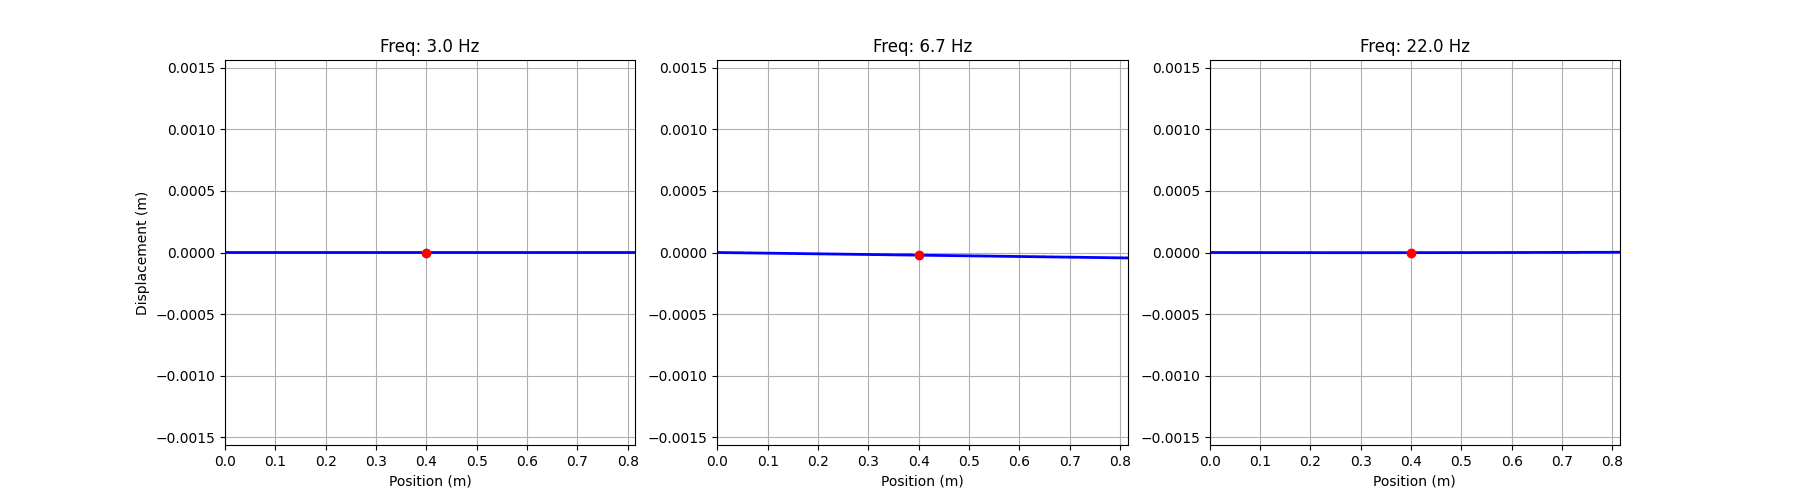

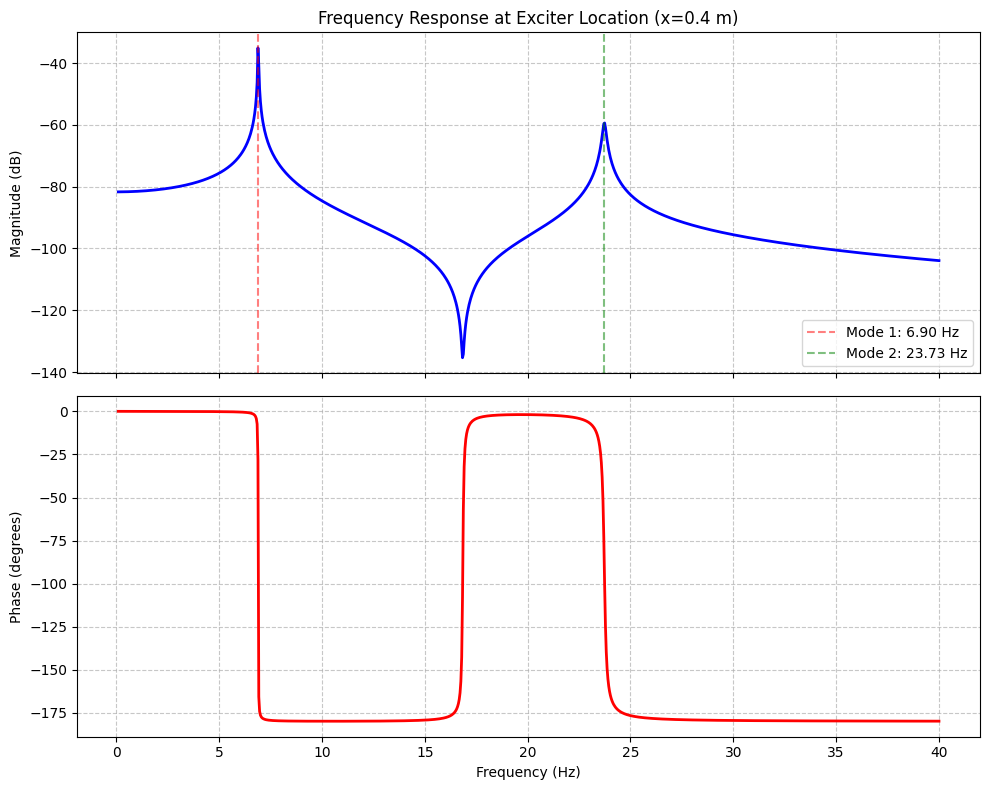

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. Frequency Range Setup =================
# Define frequency range (e.g., 0.1 to 40 Hz) to cover both modes
freqs = np.linspace(0.1, 40, 1000)
omegas = 2 * np.pi * freqs

# Measurement Location: Driving Point (x = le)
x_measure = le

# ================= 2. Compute FRF (Receptance) =================
# H(w) = Sum [ (psi_k(x) * psi_k(le)) / (K - w^2 M + j w C) ]
H_total = np.zeros_like(omegas, dtype=complex)

for i, w in enumerate(omegas):
    # Mode 1 Contribution
    numer1 = psi1(x_measure) * psi1(le)
    denom1 = K11 - M11 * (w**2) + 1j * (C11 * w)

    # Mode 2 Contribution
    numer2 = psi2(x_measure) * psi2(le)
    denom2 = K22 - M22 * (w**2) + 1j * (C22 * w)

    H_total[i] = (numer1 / denom1) + (numer2 / denom2)

# ================= 3. Convert to Magnitude (dB) and Phase (deg) =================
mag_dB = 20 * np.log10(np.abs(H_total))
phase_rad = np.unwrap(np.angle(H_total)) # Unwrap to avoid 180/-180 jumps
phase_deg = np.degrees(phase_rad)

# ================= 4. Plotting =================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot A: Magnitude in dB
ax1.plot(freqs, mag_dB, 'b-', lw=2)
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title(f'Frequency Response at Exciter Location (x={le} m)')
ax1.grid(True, which="both", linestyle='--', alpha=0.7)
# Mark Natural Frequencies
f1 = omega1 / (2*np.pi)
f2 = omega2 / (2*np.pi)
ax1.axvline(f1, color='r', linestyle='--', alpha=0.5, label=f'Mode 1: {f1:.2f} Hz')
ax1.axvline(f2, color='g', linestyle='--', alpha=0.5, label=f'Mode 2: {f2:.2f} Hz')
ax1.legend(loc='lower right')

# Plot B: Phase in Degrees
ax2.plot(freqs, phase_deg, 'r-', lw=2)
ax2.set_ylabel('Phase (degrees)')
ax2.set_xlabel('Frequency (Hz)')
ax2.grid(True, which="both", linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Activity #4

## Frequency Response Data Analysis

Table 1: Experimental values of the frequency response of the beam about the first resonance.

| Exciter Speed (Hz) | Displacement Amplitude (mm) | Phase Angle (deg) |
| :--- | :--- | :--- |
| 5.17 | 0.0902 | 13 |
| 5.42 | 0.1172 | 13 |
| 5.67 | 0.1903 | 15 |
| 5.92 | 0.2285 | 16 |
| 6.17 | 0.4148 | 18 |
| 6.27 | 0.5850 | 22 |
| 6.37 | 0.9735 | 60 |
| **6.47** | **2.2090** | **93** |
| 6.57 | 1.9860 | 120 |
| 6.67 | 1.0245 | 142 |
| 6.77 | 0.6575 | 155 |
| 6.87 | 0.4890 | 165 |
| 7.12 | 0.3070 | 172 |
| 7.37 | 0.2260 | 178 |
| 7.62 | 0.1847 | 179 |
| 7.87 | 0.1569 | 179 |

The following data represents the vibration characteristics of the system. Note the resonance peak occurring near **6.47 Hz**, where displacement is maximized and the phase shift is approximately **90°**.

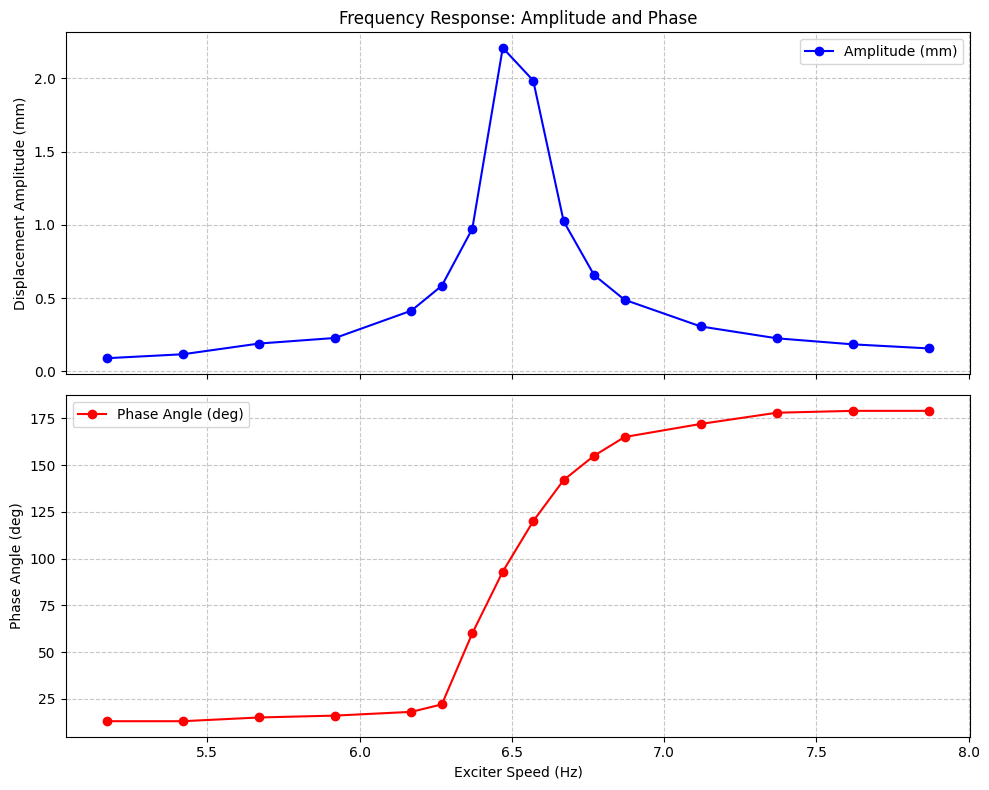

In [57]:
import matplotlib.pyplot as plt

# Data
frequency = [5.17, 5.42, 5.67, 5.92, 6.17, 6.27, 6.37, 6.47, 6.57, 6.67, 6.77, 6.87, 7.12, 7.37, 7.62, 7.87]
amplitude = [0.0902, 0.1172, 0.1903, 0.2285, 0.4148, 0.5850, 0.9735, 2.2090, 1.9860, 1.0245, 0.6575, 0.4890, 0.3070, 0.2260, 0.1847, 0.1569]
phase = [13, 13, 15, 16, 18, 22, 60, 93, 120, 142, 155, 165, 172, 178, 179, 179]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Displacement Amplitude vs Frequency
ax1.plot(frequency, amplitude, 'bo-', label='Amplitude (mm)')
ax1.set_ylabel('Displacement Amplitude (mm)')
ax1.set_title('Frequency Response: Amplitude and Phase')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# Plot Phase Angle vs Frequency
ax2.plot(frequency, phase, 'ro-', label='Phase Angle (deg)')
ax2.set_xlabel('Exciter Speed (Hz)')
ax2.set_ylabel('Phase Angle (deg)')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()

## Comparison of Experimental and Theoretical Results

Based on the frequency response data obtained from the experiment, we can observe a clear distinction between the measured behavior and the theoretical predictions.

* **Experimental Resonance Frequency ($f_d$):** $\approx 6.47 - 6.50$ Hz
* **Theoretical Natural Frequency ($f_n$):** $\approx 6.90$ Hz

### Discussion of Discrepancies

The difference between the theoretical value ($6.9$ Hz) and the experimental value ($\approx 6.5$ Hz) is a common occurrence in mechanical vibration analysis. Several factors contribute to this shift:

#### 1. Damping Effects
Theoretical natural frequencies are often calculated for undamped systems. In a real experiment, damping (from air resistance, internal friction in the beam, or the motor setup) reduces the frequency at which the maximum amplitude occurs. The damped natural frequency is defined as:
$$f_d = f_n \sqrt{1 - \zeta^2}$$
where $\zeta$ is the damping ratio.

#### 2. Added Mass (Loading Effect)
The theoretical model may not fully account for the "added mass" of the exciter motor, the displacement sensor (if contact-based), or even the fasteners. An increase in the system's mass ($m$) without a corresponding increase in stiffness ($k$) results in a lower natural frequency:
$$f_n = \frac{1}{2\pi}\sqrt{\frac{k}{m}}$$

#### 3. Boundary Condition Non-Ideality
Theoretical calculations for beams often assume "perfect" boundary conditions (e.g., perfectly rigid fixed ends). In a lab setup, the supports may have some inherent flexibility. This reduction in the effective stiffness ($k$) of the system directly lowers the observed resonance frequency.

#### 4. Measurement Resolution
The experimental peak was identified based on discrete frequency steps. The actual resonance might lie between $6.47$ Hz and $6.57$ Hz. Finer frequency increments around the peak would provide a more precise experimental value.

Reducing the Discrepancies due to damping via Damped 2-DOF Model **


To generate the theoretical Frequency Response Function (FRF), we approximate the continuous beam as a 2-Degree-of-Freedom system. This allows us to predict the amplitude of vibration at the beam tip ($x=L$) across a range of excitation frequencies ($\omega$).

### **1. Matrix Equation of Motion**
Using the first two mode shapes $\psi_1(x)$ and $\psi_2(x)$ as generalized coordinates, the equations of motion in matrix form are:

$$\mathbf{[M]}\{\ddot{q}\} + \mathbf{[C]}\{\dot{q}\} + \mathbf{[K]}\{q\} = \mathbf{\{Q\}}$$

Where $\mathbf{M}, \mathbf{C}, \mathbf{K}$ are the mass, damping, and stiffness matrices derived from the orthogonality of the modes.

### **2. Modal Superposition (The "Magnification Factor")**
Because the mode shapes are orthogonal, this matrix equation decouples into independent equations for each mode. The total response of the beam is the sum (superposition) of these modes.

For a specific mode $i$, the amplitude of vibration $X_i(\omega)$ is given by the standard forced vibration formula:

$$X_i(\omega) = \frac{F_0 / k_i}{\sqrt{\left[1 - \left(\frac{\omega}{\omega_{n,i}}\right)^2\right]^2 + \left[2\zeta_i \frac{\omega}{\omega_{n,i}}\right]^2}}$$

Where:
* $\omega_{n,i}$: Natural frequency of mode $i$
* $\zeta_i$: Damping ratio (approx 0.02)
* $F_0 / k_i$: Static deflection for that mode

### **3. Total Frequency Response**
The physical displacement at the tip of the beam $y(L, \omega)$ is the sum of the contributions from both modes:

$$y(L, \omega) = \sum_{i=1}^{2} \psi_i(L) \cdot X_i(\omega)$$

*This equation accounts for the "Added Mass" and "Damping" effects, providing a theoretical curve we can overlay on the experimental data.*

--- CALCULATION RESULTS ---
MODE 1:
  > Undamped Freq (fn):   6.9028 Hz
  > Damping Ratio (zeta): 0.0230
  > Damped Freq (fd):     6.9009 Hz  (Free Vibration)
  > Resonance Peak (f_r): 6.8991 Hz  (Forced Peak)
------------------------------
MODE 2:
  > Undamped Freq (fn):   23.7294 Hz
  > Damping Ratio (zeta): 0.0791
  > Damped Freq (fd):     23.6552 Hz  (Free Vibration)
  > Resonance Peak (f_r): 23.5806 Hz  (Forced Peak)
------------------------------
Verify from Plot Data: Max Amplitude occurs at 6.8966 Hz


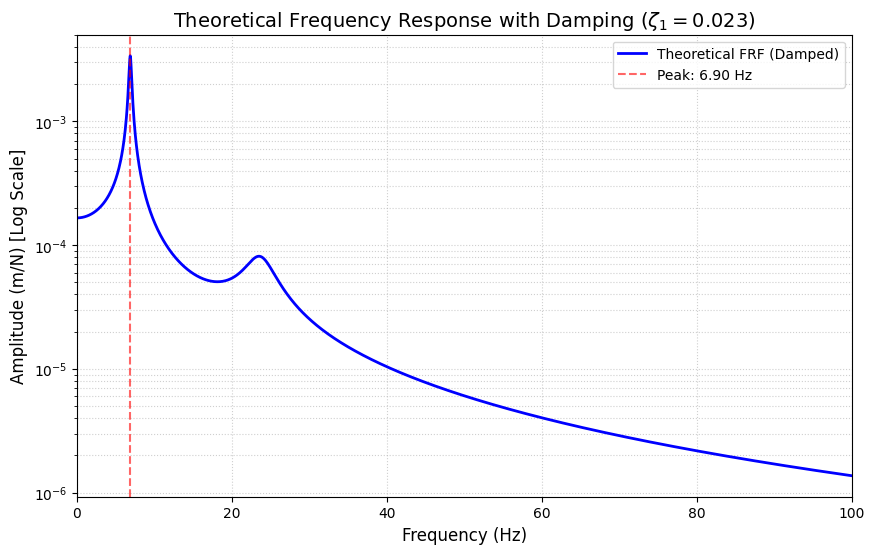

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
# Physical Constants
L = 0.815           # Length (m)
m_beam = 1.65       # Mass (kg)
rho_A = m_beam / L  # Linear Density (kg/m)
E = 2e11            # Young's Modulus (Pa)
b, h = 0.025, 0.01  # Dimensions (m)
I = (b * h**3) / 12
EI = E * I

# Attachments
ks = 3800       # Spring Stiffness
ls = 0.75       # Spring Loc
ms_eff = 0.1383 # Sensor Mass
me = 4.2        # Exciter Mass
le = 0.4        # Exciter Loc
md = 0.53       # Damper Mass
ld = 0.2        # Damper Loc

# Excitation
F0 = 0.5        # Force Amplitude (N)

# ================= 2. Mode Shape Definitions =================
# Mode 1: Rigid Body
def psi1(x): return x / L

# Mode 2: Flexural (Pinned-Free)
def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x): # Second derivative for Stiffness
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

psi_funcs = [psi1, psi2]

# ================= 3. Hybrid Model Calculations =================
print("--- CALCULATION RESULTS ---")

# --- Mass (M) ---
Jo = (1/3)*m_beam*L**2 + ms_eff*ls**2 + me*le**2 + md*ld**2
M11 = Jo / (L**2)

m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff*psi2(ls)**2 + me*psi2(le)**2 + md*psi2(ld)**2

# --- Stiffness (K) ---
K11 = (ks * ls**2) / (L**2)

k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# --- Frequencies & Damping ---
M_eq = [M11, M22]
K_eq = [K11, K22]
W_n = []  # Undamped Natural Freq (rad/s)
Zeta = [] # Damping Ratios

# Damping Assumptions
zeta1_input = 0.023 # Experimental damping for Mode 1
omega1_undamped = np.sqrt(K11 / M11)
omega2_undamped = np.sqrt(K22 / M22)

# Stiffness Proportional Damping: zeta2 scales with freq
zeta2_calc = zeta1_input * (omega2_undamped / omega1_undamped)

W_n = [omega1_undamped, omega2_undamped]
Zeta = [zeta1_input, zeta2_calc]

# ================= 4. Damped Frequency Calculation =================
for i in range(2):
    fn_hz = W_n[i] / (2 * np.pi)
    z = Zeta[i]

    # 1. Damped Natural Frequency (Free Vibration)
    # wd = wn * sqrt(1 - z^2)
    fd_hz = fn_hz * np.sqrt(1 - z**2)

    # 2. Resonance Frequency (Forced Vibration Peak)
    # wr = wn * sqrt(1 - 2*z^2)  (Only valid for z < 0.707)
    f_res_hz = fn_hz * np.sqrt(1 - 2 * z**2)

    print(f"MODE {i+1}:")
    print(f"  > Undamped Freq (fn):   {fn_hz:.4f} Hz")
    print(f"  > Damping Ratio (zeta): {z:.4f}")
    print(f"  > Damped Freq (fd):     {fd_hz:.4f} Hz  (Free Vibration)")
    print(f"  > Resonance Peak (f_r): {f_res_hz:.4f} Hz  (Forced Peak)")
    print("-" * 30)

# ================= 5. Frequency Response Plotting =================
# We use a fine resolution to capture the sharp peaks
freq_hz = np.linspace(0.1, 100, 2000)
omega_sweep = 2 * np.pi * freq_hz

total_response = np.zeros_like(omega_sweep)
x_force = L # Force at Tip
x_resp = L  # Response at Tip

for i in range(2):
    # Static Deflection (Force F0 distributed to mode i)
    # Generalized Force Q = F0 * psi(L)
    Q = F0 * psi_funcs[i](x_force)
    delta_st = Q / K_eq[i]

    # Magnification Factor: M = 1 / sqrt( (1-r^2)^2 + (2*z*r)^2 )
    r = omega_sweep / W_n[i]
    mag = 1 / np.sqrt( (1 - r**2)**2 + (2 * Zeta[i] * r)**2 )

    # Modal Amplitude
    X_i = delta_st * mag

    # Superposition (convert back to physical coordinate)
    total_response += np.abs(X_i * psi_funcs[i](x_resp))

# Find the exact peak from the plot data to confirm
peak_idx = np.argmax(total_response[:500]) # Check first mode region
peak_freq_plot = freq_hz[peak_idx]

print(f"Verify from Plot Data: Max Amplitude occurs at {peak_freq_plot:.4f} Hz")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(freq_hz, total_response, 'b-', linewidth=2, label='Theoretical FRF (Damped)')

# Mark the Calculated Damped Resonance Peak
plt.axvline(peak_freq_plot, color='r', linestyle='--', alpha=0.6, label=f'Peak: {peak_freq_plot:.2f} Hz')

plt.yscale('log')
plt.title(f'Theoretical Frequency Response with Damping ($\\zeta_1={zeta1_input}$)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Amplitude (m/N) [Log Scale]', fontsize=12)
plt.grid(True, which="both", linestyle=':', alpha=0.6)
plt.xlim(0, 100)
plt.legend()
plt.show()

Calculating Modal Parameters...
Mode 1: Fn = 53.00 Hz, Stiffness k = 9.14e+04
Mode 2: Fn = 171.75 Hz, Stiffness k = 9.61e+05


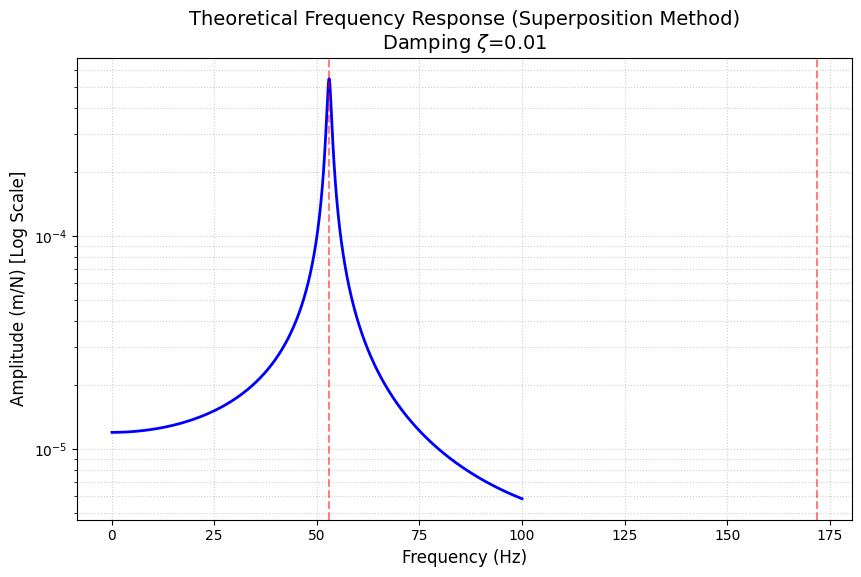

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ================= 1. System Setup =================
# Parameters (Ensure l_beam, rho_A, EI, betaL_roots are defined from previous cells)
L = l_beam
n_modes = 2
damping_ratio = 0.01  # experimental damping ratio for the first mode
F0 = 0.5              # Excitation Force (1 Newton)

# Helper: Mode Shape Function
def get_psi(x, mode_idx):
    bL = betaL_roots[mode_idx]
    return get_mode_shape(x, bL, L)

# ================= 2. Calculate Modal Parameters =================
# We need Equivalent Mass (M_eq) and Stiffness (K_eq) for each mode
M_eq = []
K_eq = []
W_n = [] # Natural frequencies (rad/s)

print("Calculating Modal Parameters...")
for i in range(n_modes):
    # Equivalent Mass: Integral of rho*A * psi^2
    integrand = lambda x: rho_A * get_psi(x, i)**2
    m_val, _ = quad(integrand, 0, L)
    M_eq.append(m_val)

    # Natural Frequency (rad/s)
    w_n = (betaL_roots[i] / L)**2 * np.sqrt(EI / rho_A)
    W_n.append(w_n)

    # Equivalent Stiffness: k = w_n^2 * m
    k_val = (w_n**2) * m_val
    K_eq.append(k_val)

    print(f"Mode {i+1}: Fn = {w_n/ (2*np.pi):.2f} Hz, Stiffness k = {k_val:.2e}")

# ================= 3. Frequency Response (Modal Superposition) =================
freq_hz = np.linspace(0.1, 100, 1000) # Sweep 0 to 100 Hz
omega = 2 * np.pi * freq_hz

total_response = np.zeros_like(omega)

# Summing the response of each mode
for i in range(n_modes):
    # 1. Static Deflection Component for this mode (Force is applied at L)
    # The generalized force Q_i = F0 * psi_i(L)
    Q_i = F0 * get_psi(L, i)
    static_deflection = Q_i / K_eq[i]

    # 2. Magnification Factor Formula
    r = omega / W_n[i] # Frequency ratio
    magnification = 1 / np.sqrt((1 - r**2)**2 + (2 * damping_ratio * r)**2)

    # 3. Physical Contribution to Tip (psi_i(L) * Amplitude)
    # Note: We take absolute value for the magnitude plot
    mode_amplitude = static_deflection * magnification

    # Add to total response (Superposition)
    # We multiply by psi(L, i) again because we are converting back to physical coordinates
    total_response += np.abs(mode_amplitude * get_psi(L, i))

# ================= 4. Plotting =================
plt.figure(figsize=(10, 6))
plt.plot(freq_hz, total_response, 'b-', linewidth=2)
plt.yscale('log')
plt.title(f'Theoretical Frequency Response (Superposition Method)\nDamping $\\zeta$={damping_ratio}', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Amplitude (m/N) [Log Scale]', fontsize=12)
plt.grid(True, which="both", linestyle=':', alpha=0.6)

# Mark natural frequencies
for w in W_n:
    plt.axvline(w / (2*np.pi), color='r', linestyle='--', alpha=0.5)

plt.show()